In [2]:
import os
from dotenv import load_dotenv
import praw

#Make sure everything is set up correctly
print("Client ID:", os.getenv("REDDIT_CLIENT_ID"))
print("Secret:", os.getenv("REDDIT_SECRET"))
print("Username:", os.getenv("REDDIT_USERNAME"))
print("Password loaded:", os.getenv("REDDIT_PASSWORD") is not None)
print("User Agent:", os.getenv("REDDIT_USER_AGENT"))


Client ID: DHJ6i6-NjssQ5b5SPIqJvw
Secret: NkUebd7YS1ZzQLhzVq_9dyyYHOyDEQ
Username: Sad-State-7591
Password loaded: True
User Agent: script:aston.scraper:v1.0 (by u/Sad-State-7591)


In [3]:

load_dotenv()

reddit = praw.Reddit(
    client_id=os.getenv("REDDIT_CLIENT_ID"),
    client_secret=os.getenv("REDDIT_SECRET"),
    username=os.getenv("REDDIT_USERNAME"),
    password=os.getenv("REDDIT_PASSWORD"),
    user_agent=os.getenv("REDDIT_USER_AGENT")
)

print("Logged in as:", reddit.user.me())


Logged in as: Sad-State-7591


In [18]:
am_aliases = ["aston martin", "amf1", "alonso", "stroll", "green car", "fernando", "lance", "aston"]

def contains_alias(post):
    combined_text = (post.title + " " + post.selftext).lower()
    return any(alias in combined_text for alias in am_aliases)

posts = []
for post in subreddit.new(limit=100000):
    if contains_alias(post):
        posts.append({
            "title": post.title,
            "text": post.selftext,
            "upvotes": post.score,
            "num_comments": post.num_comments,
            "created_utc": post.created_utc,
            "url": post.url
        })

In [19]:
posts

[{'title': "What's going so wrong with Aston Martin's 2025 F1 season",
  'text': 'But now, with its regular line-up in place, a £150 million factory up and running (including a state-of-the-art windtunnel) and Adrian Newey having been lured from Red Bull, everything Aston Martin needs to deliver is in place. And yet it isn’t.\n\n',
  'upvotes': 411,
  'num_comments': 109,
  'created_utc': 1746001508.0,
  'url': 'https://www.the-race.com/formula-1/whats-going-wrong-aston-martin-2025-season/'},
 {'title': '‘I will see how motivated I am’ – Fernando Alonso opens up on his F1 future post-2026 as he insists he doesn’t want to ‘compromise’ Aston Martin | Formula 1®',
  'text': '',
  'upvotes': 1101,
  'num_comments': 101,
  'created_utc': 1745956474.0,
  'url': 'https://www.formula1.com/en/latest/article/i-will-see-how-motivated-i-am-alonso-opens-up-on-his-f1-future-post-2026-as.V9KNWb0kNnMtAmewDi5Un'},
 {'title': 'What was your earliest F1 memory?',
  'text': 'The first race I watched was t

# BASIC TEXT EXPLORATION

In [20]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns

# For co-occurrence and lift
from itertools import combinations
from collections import defaultdict

In [21]:
#Create a data frame with the posts info
df = pd.DataFrame(posts)

#Combine title and text
df['content'] = df['title'] + " " + df['text']

stop_words =  set(stopwords.words('english'))

def basic_preprocessing(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return tokens

df['cleaned'] = df['content'].apply(basic_preprocessing)

Top 20 most frequent words:
alonso: 29
aston: 19
martin: 17
fernando: 15
points: 15
stroll: 15
season: 10
every: 10
alpine: 10
mclaren: 10
race: 9
piastri: 9
bortoleto: 8
top: 7
last: 7
years: 7
time: 7
norris: 7
hadjar: 7
teammates: 7


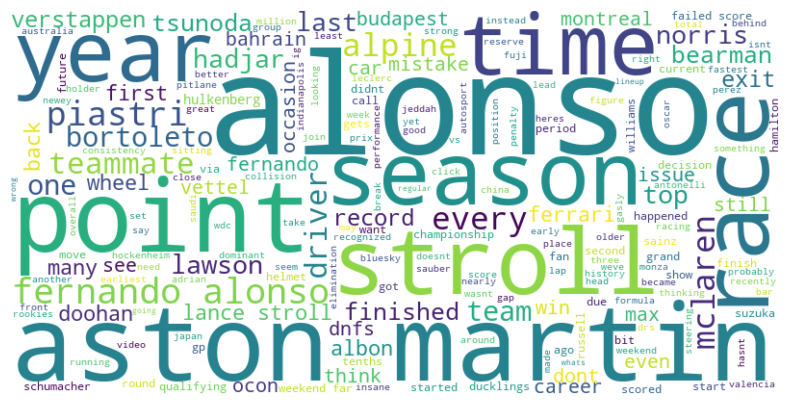

In [16]:
#Word frequency
# Flatten all tokens into a single list
all_tokens = [token for sublist in df['cleaned'] for token in sublist]

# Count word frequencies
word_freq = Counter(all_tokens)

# Display top 20 words
print("Top 20 most frequent words:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")

# Optional: Word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

(53, 8)

In [ ]:
#Perform text Preprocessing to the comments
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer



#Preprocess the text: lowercase, remove stopwords, lemmatize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

df['cleaned'] = df['content'].apply(preprocess)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juandavidovallevega/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juandavidovallevega/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juandavidovallevega/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Sentiment Analysis


0    going wrong aston martin season regular place ...
1    see motivated fernando alonso open future insi...
2          aston martin explain wind tunnel opened eye
Name: cleaned, dtype: object